# Numpy (phần 2)

**Reference**
1. [Python Data Science Handbook
](https://jakevdp.github.io/PythonDataScienceHandbook/02.00-introduction-to-numpy.htm)
2. [Numpy cheat sheet](https://www.datacamp.com/cheat-sheet/numpy-cheat-sheet-data-analysis-in-python)

In [1]:
import numpy as np

import matplotlib.pyplot as plt
import seaborn; seaborn.set() # Plot styling
import math # Thư viện built-in của Python

## Review

### Tạo Numpy array & xem thông tin của Numpy array

Tạo Numpy array: \
`np.array` \
`np.full` `np.zeros` `np.ones` \
`np.random.random` \
`np.empty` \
`np.eye` \
`np.arange` `np.linspace` \
`np.reshape` \
`np.genfromtxt`\
...

Xem thông tin của Numpy array: \
`a.ndim` `a.shape` `a.size` \
`a.dtype` \
`a.itemsize` `a.nbytes` \
...

### Truy xuất (và thay đổi) các phần tử trong Numpy array

- Integer indexing
- Slicing
- Bool array indexing
- Integer array indexing
- Kết hợp 4 loại trên với nhau (khi làm với array nhiều chiều)

### Tính toán trên Numpy array 

Để sử dụng Numpy hiệu quả thì thay đổi cách tư duy: cần suy nghĩ về <font color=blue>các thao tác tính toán trên nguyên mảng</font> mà Numpy đã cung cấp, chứ không phải là các thao tác tính toán trên từng con số

Hầu hết mọi thao tác tính toán trên mảng mà ta có thể nghĩ tới thì đều đã được Numpy cung cấp:

`+`, `np.add`\
`-`, `np.subtract`\
`-`, `np.negative`\
`*`, `np.multiply`\
`@`, `np.dot`\
`/`, `np.divide`\
`//`, `np.floor_divide`\
`**`, `np.power`\
`%`, `np.mod`\
`np.abs`\
`np.exp`\
`np.log`\
...

`==`, `np.equal`\
`<`, `np.less`\
`>`, `np.greater`\
`!=`, `np.not_equal`\
`<=`, `np.less_equal`\
`>=`, `np.greater_equal`\
`&`, `np.bitwise_and`\
`|`, `np.bitwise_or`\
`~`, `np.bitwise_not`\
`np.nonzero`\
`np.any`\
`np.all`\
...

`np.sum`\
`np.prod`\
`np.min`\
`np.max`\
`np.argmin`\
`np.argmax`\
...

`np.mean`\
`np.std`\
`np.percentile`\
`np.histogram`\
`np.unique`\
`np.sort`\
`np.argsort`\
...

Với một tính toán nào đó trên Numpy array, ngoài dạng hàm (hoặc toán tử) thì thường ta cũng có thể gọi phương thức tương đương từ Numpy array \
$\to$ Giúp đáp ứng các "khẩu vị code" khác nhau của người dùng

## Áp dụng Numpy để thực hiện khám phá và tiền xử lý dữ liệu

**Trong phần này, chúng ta sẽ thực hiện quy trình khám phá dữ liệu trên tập dữ liệu P4DS-Grades.csv với sự hỗ trợ của thư viện `numpy`**

In [2]:
# Tạo array từ file
# File 'P4DS-Grades.csv' chứa điểm này của khóa trước ;-)
# 3 cột đầu ứng với điểm 3 HW (mỗi HW chiếm 50%/3 tổng điểm)
# cột cuối ứng điểm đồ án cuối kỳ (chiếm 50% tổng điểm)
p4ds_grades = np.genfromtxt('Data/P4DS-Grades.csv',
                            delimiter=',', skip_header=1)
p4ds_grades

array([[ 0.  ,  0.  ,  0.  ,  0.  ],
       [10.  , 10.  , 10.  ,  9.5 ],
       [10.  ,  9.25,  9.  ,  7.  ],
       [10.  ,  9.5 ,  9.85,  8.  ],
       [10.  ,  9.75,  9.75,  9.  ],
       [10.  , 10.  , 10.  ,  8.5 ],
       [10.  , 10.  ,  9.75,  9.  ],
       [10.  ,  9.5 ,  9.7 ,  9.  ],
       [10.  ,  9.75,  9.35,  9.  ],
       [10.  , 10.  ,  9.6 ,  8.  ],
       [ 9.  ,  9.25,  9.9 ,  7.5 ],
       [10.  , 10.  , 10.  ,  8.  ],
       [10.  ,  8.5 ,  5.75,  7.  ],
       [10.  ,  9.5 ,  9.75,  8.  ],
       [ 9.25, 10.  , 10.  ,  8.5 ],
       [10.  , 10.  , 10.  , 10.  ],
       [ 8.5 ,  8.25,  0.  ,  0.  ],
       [10.  , 10.  ,  9.9 ,  9.  ],
       [10.  ,  9.5 ,  9.45,  9.  ],
       [ 9.75, 10.  , 10.  ,  9.  ],
       [10.  , 10.  ,  9.  , 10.  ],
       [10.  ,  9.75, 10.  , 10.  ],
       [ 9.75,  9.5 ,  5.25,  6.5 ],
       [ 9.75,  9.75, 10.  ,  9.5 ],
       [ 9.5 , 10.  , 10.  ,  7.5 ],
       [10.  ,  9.25,  9.9 ,  9.  ],
       [10.  , 10.  , 10.  ,  7.5 ],
 

In [3]:
#Dữ liệu có bao nhiêu dòng và bao nhiêu cột?
p4ds_grades.shape

(45, 4)

In [4]:
# Tính min, max của mỗi cột điểm
# để xem có gì bất thường không
print(np.min(p4ds_grades, axis=0))
print(np.max(p4ds_grades, axis=0))

[0. 0. 0. 0.]
[10. 10. 10. 10.]


In [5]:
# Tính cột điểm tổng kết
avg_grades = (p4ds_grades[:, 0] * 0.5 / 3
              + p4ds_grades[:, 1] * 0.5 / 3
              + p4ds_grades[:, 2] * 0.5 / 3
              + p4ds_grades[:, 3] * 0.5)
avg_grades.round(1)

array([ 0. ,  9.8,  8.2,  8.9,  9.4,  9.2,  9.5,  9.4,  9.4,  8.9,  8.4,
        9. ,  7.5,  8.9,  9.1, 10. ,  2.8,  9.5,  9.3,  9.5,  9.8, 10. ,
        7.3,  9.7,  8.7,  9.4,  8.8,  9.6,  8.4,  6.4,  9.2,  9.3,  8.4,
        8.5,  8.2,  6.3,  8.1,  8.2,  5.9,  8.1,  9.5,  9. , 10. ,  7.5,
        9. ])

In [6]:
# Tỉ lệ sinh viên rớt môn là bao nhiêu?
a = avg_grades < 5
# a.sum() / len(a)
a.mean()

0.044444444444444446

In [52]:
# Tính mean & standard deviation của cột điểm tổng kết
print(avg_grades.mean())
print(avg_grades.std())

8.443703703703703
1.812645188357383


In [53]:
# Tính min, lower quartile, median, upper quartile, max 
# của cột điểm tổng kết
print(np.percentile(avg_grades, 0))
print(np.percentile(avg_grades, 25))
print(np.percentile(avg_grades, 50))
print(np.percentile(avg_grades, 75))
print(np.percentile(avg_grades, 100))

0.0
8.241666666666667
8.958333333333334
9.416666666666668
10.0


In [54]:
# So sánh hàm tính percentile của Numpy với hàm tự viết trước đây
def compute_percentile(data, p):
    sorted_data = sorted(data)
    i = int(p / 100 * (len(sorted_data)-1))
    return sorted_data[i]

data = np.arange(1, 10)
for p in range(0, 101, 10):
    print(compute_percentile(data, p), end=' ')
    print(np.percentile(data, p, method='lower'))

1 1
1 1
2 2
3 3
4 4
5 5
5 5
6 6
7 7
8 8
9 9


In [55]:
# compute a histogram manually
bins = np.linspace(0, 10, 10)
counts = np.zeros_like(bins)

# find the appropriate bin for each x
i = np.searchsorted(bins, avg_grades)
print(i)
# add 1 to each of these bins
np.add.at(counts, i, 1)
print(counts)

[0 9 8 9 9 9 9 9 9 9 8 9 7 8 9 9 3 9 9 9 9 9 7 9 8 9 8 9 8 6 9 9 8 8 8 6 8
 8 6 8 9 9 9 7 9]
[ 1.  0.  0.  1.  0.  0.  3.  3. 12. 25.]


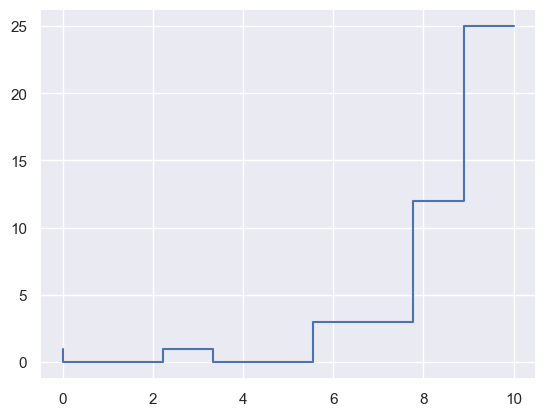

In [56]:
# plot the results
plt.step(bins, counts);

In [57]:
np.histogram(avg_grades,10)[0]

array([ 1,  0,  1,  0,  0,  1,  2,  3, 15, 22], dtype=int64)

(array([ 1.,  0.,  1.,  0.,  0.,  1.,  2.,  3., 15., 22.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

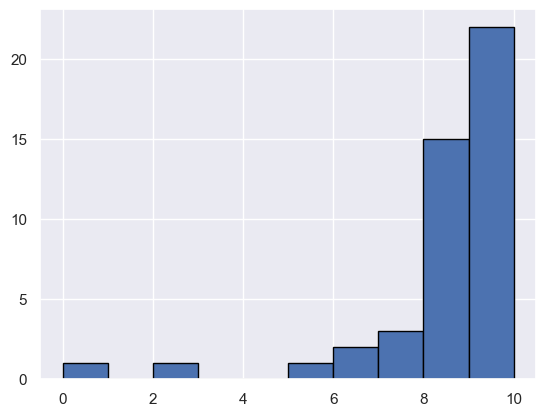

In [58]:
# Tính histogram của cột điểm tổng kết, rồi vẽ
counts, bins = np.histogram(avg_grades, bins=range(11))
plt.hist(bins[:-1], bins, edgecolor='black', weights=counts)



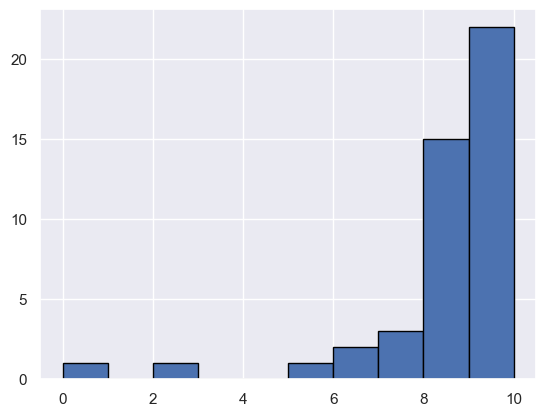

In [59]:
# Tính histogram và vẽ luôn một lần bằng câu lệnh plt.hist
plt.figure()
plt.hist(avg_grades, bins=range(11), edgecolor='black');

In [60]:
avg_grades

array([ 0.        ,  9.75      ,  8.20833333,  8.89166667,  9.41666667,
        9.25      ,  9.45833333,  9.36666667,  9.35      ,  8.93333333,
        8.44166667,  9.        ,  7.54166667,  8.875     ,  9.125     ,
       10.        ,  2.79166667,  9.48333333,  9.325     ,  9.45833333,
        9.83333333,  9.95833333,  7.33333333,  9.66666667,  8.66666667,
        9.35833333,  8.75      ,  9.625     ,  8.35833333,  6.41666667,
        9.16666667,  9.33333333,  8.39166667,  8.5       ,  8.25      ,
        6.34166667,  8.125     ,  8.24166667,  5.875     ,  8.13333333,
        9.5       ,  9.        , 10.        ,  7.51666667,  8.95833333])

In [61]:
# Thêm cột điểm tổng kết vào array gồm 4 cột điểm thành phần
p4ds_grades_final = np.concatenate([p4ds_grades, avg_grades.reshape(-1, 1)], axis=1)

In [62]:
p4ds_grades_final

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [10.        , 10.        , 10.        ,  9.5       ,  9.75      ],
       [10.        ,  9.25      ,  9.        ,  7.        ,  8.20833333],
       [10.        ,  9.5       ,  9.85      ,  8.        ,  8.89166667],
       [10.        ,  9.75      ,  9.75      ,  9.        ,  9.41666667],
       [10.        , 10.        , 10.        ,  8.5       ,  9.25      ],
       [10.        , 10.        ,  9.75      ,  9.        ,  9.45833333],
       [10.        ,  9.5       ,  9.7       ,  9.        ,  9.36666667],
       [10.        ,  9.75      ,  9.35      ,  9.        ,  9.35      ],
       [10.        , 10.        ,  9.6       ,  8.        ,  8.93333333],
       [ 9.        ,  9.25      ,  9.9       ,  7.5       ,  8.44166667],
       [10.        , 10.        , 10.        ,  8.        ,  9.        ],
       [10.        ,  8.5       ,  5.75      ,  7.        ,  7.54166667],
       [10.        ,  9.5       ,  9.7

In [63]:
# Lưu array gồm 4 cột điểm thành phần + 1 cột điểm tổng kết 
# xuống file
# Bạn có thể dùng hàm np.savetxt
np.savetxt("Data/P4DS_GradeFinal.csv",p4ds_grades_final.round(1), delimiter=',',fmt='%1.1f')

## Fancy Indexing

In [64]:
x = np.arange(11) * 10
print(x)

[  0  10  20  30  40  50  60  70  80  90 100]


In [65]:
# Normal index
print(x[0],x[3],x[5])

0 30 50


In [66]:
# Dùng list như index
ind = [0,3,5]
x[ind]

array([ 0, 30, 50])

Khi dùng *fancy indexing*, `shape` của kết quả sẽ là `shape` của *index array*, chứ không phải *mảng được index*

In [67]:
ind = np.array([[3, 7],
                [4, 5]])
x[ind]

array([[30, 70],
       [40, 50]])

**Fancy indexing 2D**

In [68]:
X = np.arange(12).reshape((3, 4))
X

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [69]:
# Fancy index 2D
row = np.array([0, 1, 2])
col = np.array([2, 1, 3])
X[row, col]

array([ 2,  5, 11])

In [70]:
#Fancy and simple index
X[2, [2, 0, 1]]

array([10,  8,  9])

In [71]:
#Fancy and simple index
X[1:, [2, 0, 1]]

array([[ 6,  4,  5],
       [10,  8,  9]])

## Sorting

In [72]:
x = np.array([2, 1, 4, 3, 5])
np.sort(x)

array([1, 2, 3, 4, 5])

In [73]:
x = np.array([2, 1, 4, 3, 5])
x.sort()
x

array([1, 2, 3, 4, 5])

In [74]:
# argsort
x = np.array([2, 1, 4, 3, 5])
i = np.argsort(x)
print(i)

[1 0 3 2 4]


In [75]:
x[i]

array([1, 2, 3, 4, 5])

**2D Sort**

In [76]:
X = np.random.randint(0, 10, (4, 6))
print(X)

[[3 8 4 1 0 9]
 [7 1 2 5 6 7]
 [5 9 2 4 4 9]
 [2 7 8 0 8 4]]


In [77]:
# sort each column of X
np.sort(X, axis=0)

array([[2, 1, 2, 0, 0, 4],
       [3, 7, 2, 1, 4, 7],
       [5, 8, 4, 4, 6, 9],
       [7, 9, 8, 5, 8, 9]])

In [78]:
# sort each row of X
np.sort(X, axis=1)

array([[0, 1, 3, 4, 8, 9],
       [1, 2, 5, 6, 7, 7],
       [2, 4, 4, 5, 9, 9],
       [0, 2, 4, 7, 8, 8]])

In [79]:
# Tìm ra k số nhỏ nhất với partition
x = np.array([7, 2, 3, 1, 6, 5, 4])
np.partition(x, 3)

array([2, 1, 3, 4, 6, 5, 7])

In [80]:
# Tìm ra k số nhỏ nhất mỗi hàng
np.partition(X, 2, axis=1)

array([[0, 1, 3, 8, 4, 9],
       [1, 2, 5, 7, 6, 7],
       [2, 4, 4, 9, 5, 9],
       [0, 2, 4, 7, 8, 8]])

## Broadcasting

Là cơ chế của Numpy cho phép thực hiện tính toán khi các array không có cùng shape như thể có cùng shape (ở bên dưới, vụ này sẽ được thực hiện một cách hiệu quả: sẽ không tạo ra các array mới có cùng shape).

Ví dụ: 

`a = np.array([1, 2, 3])`

`a + 10`

[Luật broadcasting](https://numpy.org/devdocs/user/quickstart.html#broadcasting-rules):

- Rule 1: If the two arrays differ in their number of dimensions, the shape of the one with fewer dimensions is *padded* with ones on its leading (left) side.
- Rule 2: If the shape of the two arrays does not match in any dimension, the array with shape equal to 1 in that dimension is stretched to match the other shape.
- Rule 3: If in any dimension the sizes disagree and neither is equal to 1, an error is raised.

In [81]:
#Ví dụ 1: 1D + 2D
M = np.ones((2, 3))
a = np.arange(3)
print(f'{M.shape}\n{a.shape}')

(2, 3)
(3,)


In [82]:
M+a

array([[1., 2., 3.],
       [1., 2., 3.]])

Shape của hai mảng là:

- ``M.shape = (2, 3)``
- ``a.shape = (3,)``

Với rule 1: a có ít chiều hơn, nên sẽ được pad vào bên trái:

- ``M.shape -> (2, 3)``
- ``a.shape -> (1, 3)``

Với rule 2, chiều thứ nhất của `a`sẽ được lặp lại để khớp với `M`:

- ``M.shape -> (2, 3)``
- ``a.shape -> (2, 3)``

Shape của kết quả sẽ là ``(2, 3)``:

In [83]:
# Ví dụ 2
a = np.array([[4, 5, 6],
              [7, 8, 9]])
a.shape

(2, 3)

In [84]:
a + 10

array([[14, 15, 16],
       [17, 18, 19]])

In [85]:
# Ví dụ 3
a = np.array([[4, 5, 6],
              [7, 8, 9]])
b = np.array([1, 2, 3])
print(f'{a.shape}\n{b.shape}')

(2, 3)
(3,)


In [86]:
a * b

array([[ 4, 10, 18],
       [ 7, 16, 27]])

In [87]:
# Broadcasting - ví dụ 4
a = np.array([[4],
              [5],
              [6]])
b = np.array([1, 2, 3])
print(f'{a.shape}\n{b.shape}')

(3, 1)
(3,)


In [88]:
a + b

array([[5, 6, 7],
       [6, 7, 8],
       [7, 8, 9]])

In [89]:
# Broadcasting - ví dụ 5
a = np.array([[4, 5, 6],
              [7, 8, 9]])
b = np.array([1, 2])
print(f'{a.shape}\n{b.shape}')

(2, 3)
(2,)


In [90]:
# a * b

In [91]:
# Bài tập broadcasting:
# Chuẩn hóa để các cột của array data có mean = 0 & std = 1
# (Cách làm: lấy mỗi cột trừ cho mean của cột đó, 
#            rồi chia cho std của cột đó)
data = np.random.randint(0, 10, (20, 2))
data[:, 1] *= 3
# TODO
# data = (data - data.mean(axis=0)) / data.std(axis=0)

# print(data.mean(axis=0))
# print(data.std(axis=0))

## Áp dụng Numpy để làm một ví dụ thực tế: k-Nearest Neighbors

In [92]:
X = np.random.rand(10, 2)
X

array([[0.6987808 , 0.0946498 ],
       [0.09034824, 0.55578516],
       [0.23622962, 0.79374452],
       [0.05053997, 0.78198491],
       [0.572692  , 0.27491579],
       [0.99388652, 0.72975337],
       [0.72371413, 0.4114526 ],
       [0.02652696, 0.74085679],
       [0.73174432, 0.32869663],
       [0.03736111, 0.59100368]])

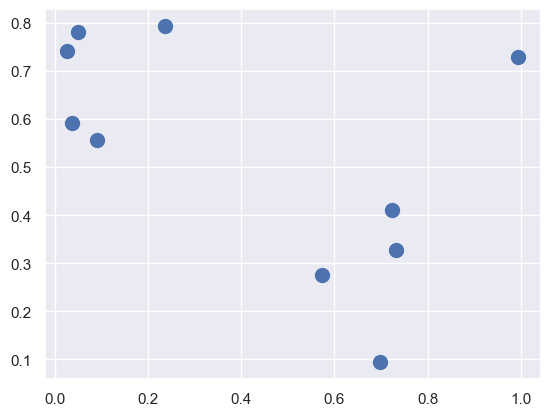

In [93]:
plt.scatter(X[:, 0], X[:, 1], s=100);

In [94]:
# for each pair of points, compute differences in their coordinates
differences = X[:, np.newaxis, :] - X[np.newaxis, :, :]
differences.shape

(10, 10, 2)

In [95]:
differences.sum(axis=2)

array([[ 0.        ,  0.1472972 , -0.23654353, -0.03909428, -0.05417719,
        -0.93020929, -0.34173612,  0.02604684, -0.26701035,  0.16506581],
       [-0.1472972 ,  0.        , -0.38384073, -0.18639148, -0.20147438,
        -1.07750648, -0.48903332, -0.12125035, -0.41430754,  0.01776862],
       [ 0.23654353,  0.38384073,  0.        ,  0.19744925,  0.18236635,
        -0.69366575, -0.10519259,  0.26259038, -0.03046681,  0.40160935],
       [ 0.03909428,  0.18639148, -0.19744925,  0.        , -0.01508291,
        -0.89111501, -0.30264184,  0.06514112, -0.22791607,  0.20416009],
       [ 0.05417719,  0.20147438, -0.18236635,  0.01508291,  0.        ,
        -0.8760321 , -0.28755894,  0.08022403, -0.21283316,  0.219243  ],
       [ 0.93020929,  1.07750648,  0.69366575,  0.89111501,  0.8760321 ,
         0.        ,  0.58847316,  0.95625613,  0.66319894,  1.0952751 ],
       [ 0.34173612,  0.48903332,  0.10519259,  0.30264184,  0.28755894,
        -0.58847316,  0.        ,  0.36778297

In [96]:
# square the coordinate differences
sq_differences = differences ** 2
sq_differences.shape

(10, 10, 2)

In [97]:
# sum the coordinate differences to get the squared distance
dist_sq = sq_differences.sum(-1)
dist_sq.shape

(10, 10)

In [98]:
dist_sq.diagonal()

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [99]:
nearest = np.argsort(dist_sq, axis=1)
print(nearest)

[[0 4 8 6 5 1 9 2 7 3]
 [1 9 7 3 2 4 6 8 0 5]
 [2 3 7 1 9 4 6 8 5 0]
 [3 7 2 9 1 4 6 8 5 0]
 [4 8 6 0 1 2 5 9 7 3]
 [5 6 8 4 0 2 1 3 9 7]
 [6 8 4 0 5 2 1 9 3 7]
 [7 3 9 1 2 4 6 8 0 5]
 [8 6 4 0 5 2 1 9 7 3]
 [9 1 7 3 2 4 6 8 0 5]]


In [100]:
K = 2
nearest_partition = nearest[:,1:K+1]
nearest_partition

array([[4, 8],
       [9, 7],
       [3, 7],
       [7, 2],
       [8, 6],
       [6, 8],
       [8, 4],
       [3, 9],
       [6, 4],
       [1, 7]], dtype=int64)

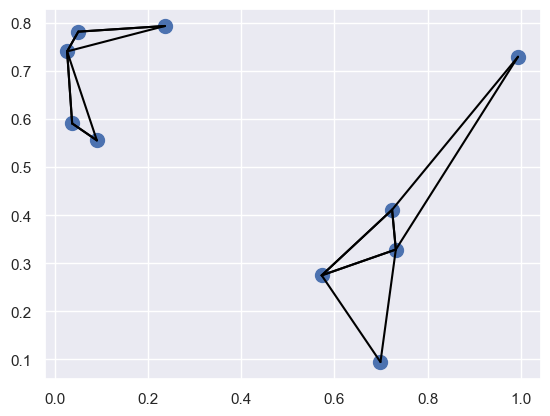

In [101]:
plt.scatter(X[:, 0], X[:, 1], s=100)

# draw lines from each point to its two nearest neighbors
K = 2

for i in range(X.shape[0]):
    for j in nearest_partition[i, :]:
        # plot a line from X[i] to X[j]
        # use some zip magic to make it happen:
        plt.plot(*zip(X[j], X[i]), color='black')

In [102]:
K = 2
nearest_partition = np.argpartition(dist_sq, K + 1, axis=1)

In [103]:
nearest_partition

array([[0, 4, 8, 6, 1, 5, 9, 7, 3, 2],
       [9, 1, 7, 3, 2, 4, 6, 5, 8, 0],
       [3, 2, 7, 1, 9, 4, 6, 5, 8, 0],
       [3, 7, 2, 9, 1, 4, 6, 5, 8, 0],
       [6, 4, 8, 0, 1, 5, 3, 7, 2, 9],
       [5, 6, 8, 4, 0, 1, 3, 7, 2, 9],
       [6, 4, 8, 0, 1, 5, 3, 7, 2, 9],
       [3, 7, 9, 1, 2, 4, 6, 5, 8, 0],
       [6, 4, 8, 0, 1, 5, 3, 7, 2, 9],
       [9, 1, 7, 3, 2, 4, 6, 5, 8, 0]], dtype=int64)

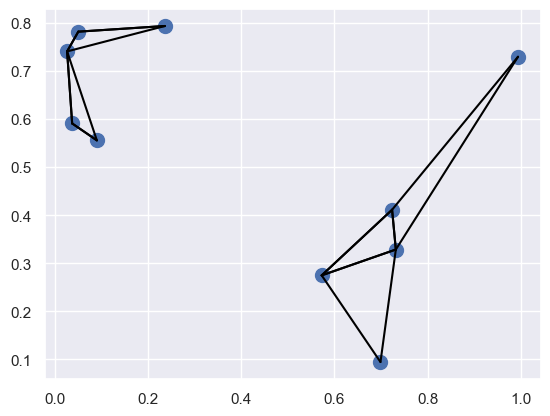

In [104]:
plt.scatter(X[:, 0], X[:, 1], s=100)

# draw lines from each point to its two nearest neighbors
K = 2

for i in range(X.shape[0]):
    for j in nearest_partition[i, :K+1]:
        # plot a line from X[i] to X[j]
        # use some zip magic to make it happen:
        plt.plot(*zip(X[j], X[i]), color='black')

## Áp dụng Numpy để làm một ví dụ thực tế: recommender system 

In [7]:
# Đọc file Ratings-Small.csv vào Numpy array
# Trong file này:
# - Mỗi cột ứng với một phim
# - Mỗi dòng ứng với một người dùng, và cho biết người này đã
#   cho mỗi phim bao nhiêu điểm (thang 1-5)
ratings = np.genfromtxt('Data/Ratings-Small.csv',
                        delimiter=',',
                        skip_header=1)
ratings

array([[ 5.,  4., nan,  1., nan],
       [nan,  4.,  4.,  2.,  2.],
       [ 3., nan, nan,  5.,  5.],
       [nan,  3.,  4.,  4., nan]])

Mục tiêu ở đây là dự đoán các giá trị thiếu của mỗi người dùng; từ đó, recommend cho người dùng các bộ phim mà ta dự đoán người dùng sẽ cho điểm cao.

Để đơn giản, ở đây ta chỉ tập trung làm cho người dùng đầu tiên.

B1: tính độ tương tự giữa các người dùng với người dùng đầu tiên

In [8]:
np.set_printoptions(suppress=True) # Để numpy in dễ nhìn

In [10]:
# Tính trọng số thể hiện cho độ tương tự giữa người dùng đầu tiên
# với tất cả người dùng 
r0 = ratings[0]
a = np.abs(ratings - r0)
a = np.nanmean(a, axis=1) # Bỏ qua nan
w = 1 / (a + 0.001) # Cộng 0.001 để tránh chia phải 0 
w

array([1000.        ,    1.99600798,    0.33322226,    0.49975012])

In [11]:
# Lấy ra các cột ứng với các phim 
# mà người dùng đầu tiên chưa cho điểm
a = ratings[:, np.isnan(r0)]
a

array([[nan, nan],
       [ 4.,  2.],
       [nan,  5.],
       [ 4., nan]])

In [12]:
# Tính ma trận trọng số đã được chuẩn hóa 
# có cùng shape với kết quả ở trên
# (tổng các cột sẽ bằng 1)
normalized_w = ~np.isnan(a) * w.reshape(-1, 1)
normalized_w = normalized_w / normalized_w.sum(axis=0)
normalized_w

array([[0.        , 0.        ],
       [0.79976019, 0.85693889],
       [0.        , 0.14306111],
       [0.20023981, 0.        ]])

In [13]:
# Nhân điểm (rating) với trọng số đã chuẩn hóa rồi cộng lại
# là sẽ ra điểm dự đoán cho người dùng đầu tiên
np.nansum(a * normalized_w, axis=0)

array([4.        , 2.42918332])

Như vậy, ta có thể recommend cho người dùng đầu tiên phim có điểm dự đoán cao.